In [1]:
import numpy as np
import pylab as pl
import tensorflow as tf

def get_data(m, d, c):
    X = np.random.uniform(- 1,  +1, (m, d))
    W = np.random.uniform(-10, +10, (d, c))
    Y = np.cos(X.dot(W))+X
    E = np.random.normal(0, 1E-1, (m, c))

    return X, Y+E

m, d, c = 128, 1, 1
X, Y = get_data(m, d, c)

In [2]:
X_tf = tf.constant(X, dtype=tf.float32)
Y_tf = tf.constant(Y, dtype=tf.float32)
D_tf = tf.reduce_sum(tf.square(tf.expand_dims(X_tf, 0)
                              -tf.expand_dims(X_tf, 1)), axis=-1)

sigma, lambd = 1E-1, 1E-3
K_tf = tf.exp(-0.5*D_tf/sigma**2)
V_tf = tf.Variable(np.random.normal(0, 1E-3, (m, c)), dtype=tf.float32)

#print(X_tf.get_shape(), D_tf.get_shape(), 
#      K_tf.get_shape(), V_tf.get_shape(), Y_tf.get_shape())

# W=Xt V  (d, c) = (d, m) (m, c)
# |Y-XW|^2+lambda |W|^2 = |Y-XXt V|^2 + lambda |Xt V|^2 
loss = tf.reduce_mean(tf.square(Y_tf-tf.matmul(K_tf, V_tf))) \
     + lambd*tf.reduce_sum(tf.matmul(tf.matmul(tf.transpose(V_tf), K_tf), V_tf))


optimizer = tf.train.AdamOptimizer(1E-3).minimize(loss)

In [3]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    num_iterations, print_every = 2**10, 2**8
    for iteration in range(num_iterations):

        sess.run(optimizer)
        
        if iteration % print_every == print_every-1:
            print(sess.run(loss))
    
    V = sess.run(V_tf)

0.02823954
0.021803308
0.02113153
0.020874798


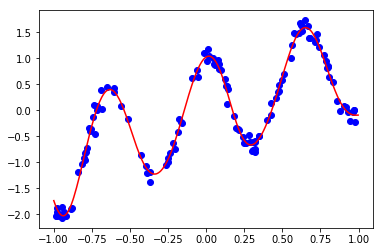

In [4]:
# inspect the learned function
b = 1000
T = np.random.uniform(-1, 1, (b, d))
D = np.sum(np.square(np.expand_dims(X, 0)-np.expand_dims(T, 1)), axis=-1)
K = np.exp(-0.5*D/sigma**2)

F = K.dot(V)

iota = T.flatten().argsort()
pl.plot(X.flatten(), Y.flatten(), "o", c="blue")
pl.plot(T.flatten()[iota], F.flatten()[iota], c="red")

pl.show()